In [2]:
#--------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import sklearn as sk
import os
import time
import random as rn
import scipy as sp
from sklearn.preprocessing import StandardScaler
import h5py
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
from torchvision import transforms
import snntorch as snn
from snntorch import utils
from torch.utils.data import DataLoader
from snntorch import spikegen


# Read the CSV file
data_frame = pd.read_csv('/home/saqib/projects/neuromorphicComputing/emg_data_class1.csv')

# Convert the DataFrame to a tensor
class1_data = torch.tensor(data_frame.values, dtype=torch.float32)


# Read the CSV file
data_frame = pd.read_csv('/home/saqib/projects/neuromorphicComputing/emg_data_class2.csv')

# Convert the DataFrame to a tensor
class2_data = torch.tensor(data_frame.values, dtype=torch.float32)

# Assign labels to each class
class1_labels = torch.zeros(500, dtype=torch.long)
class2_labels = torch.ones(500, dtype=torch.long)

# Parameters
num_samples = 1000  # Number of time steps
num_channels = 8  # Number of EMG channels
hidden_size = 64  # Number of hidden units in the RNN layer
num_classes = 2  # Number of output classes

# Concatenate the data and labels
data = torch.cat((class1_data, class2_data), dim=0)
labels = torch.cat((class1_labels, class2_labels), dim=0)

# Reshape the data for RNN compatibility
data = data.unsqueeze(dim=0)  # Add a batch dimension
data = data.permute(1, 0, 2)  # Reshape to (sequence_length, batch_size, num_channels)

# Ensure labels have the same batch size as data
labels = labels.unsqueeze(dim=0)

# Define the RNN model
class RNN(nn.Module):
    def __init__(self, num_channels, hidden_size, num_classes):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(num_channels, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Instantiate the RNN model
rnn = RNN(num_channels, hidden_size, num_classes)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.001)


epochs_list=[10,50,100,300,500,700,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000]
losses_list=[]



In [19]:
# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = rnn(data)
    loss = loss_fn(outputs.squeeze(dim=0), labels.squeeze(dim=0))
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Testing
test_outputs = rnn(data)
_, predicted = torch.max(test_outputs.squeeze(dim=0).data, 1)

# Print the predicted labels
print("Predicted Labels:")
print(predicted)

losses_list.append(loss.item())

Epoch [10/10000], Loss: 0.6415
Epoch [20/10000], Loss: 0.6416
Epoch [30/10000], Loss: 0.6414
Epoch [40/10000], Loss: 0.6414
Epoch [50/10000], Loss: 0.6414
Epoch [60/10000], Loss: 0.6413
Epoch [70/10000], Loss: 0.6413
Epoch [80/10000], Loss: 0.6413
Epoch [90/10000], Loss: 0.6413
Epoch [100/10000], Loss: 0.6413
Epoch [110/10000], Loss: 0.6413
Epoch [120/10000], Loss: 0.6413
Epoch [130/10000], Loss: 0.6413
Epoch [140/10000], Loss: 0.6413
Epoch [150/10000], Loss: 0.6413
Epoch [160/10000], Loss: 0.6413
Epoch [170/10000], Loss: 0.6413
Epoch [180/10000], Loss: 0.6413
Epoch [190/10000], Loss: 0.6413
Epoch [200/10000], Loss: 0.6412
Epoch [210/10000], Loss: 0.6412
Epoch [220/10000], Loss: 0.6412
Epoch [230/10000], Loss: 0.6412
Epoch [240/10000], Loss: 0.6412
Epoch [250/10000], Loss: 0.6412
Epoch [260/10000], Loss: 0.6412
Epoch [270/10000], Loss: 0.6412
Epoch [280/10000], Loss: 0.6425
Epoch [290/10000], Loss: 0.6412
Epoch [300/10000], Loss: 0.6412
Epoch [310/10000], Loss: 0.6412
Epoch [320/10000]

Epoch [2550/10000], Loss: 0.6395
Epoch [2560/10000], Loss: 0.6395
Epoch [2570/10000], Loss: 0.6395
Epoch [2580/10000], Loss: 0.6395
Epoch [2590/10000], Loss: 0.6395
Epoch [2600/10000], Loss: 0.6395
Epoch [2610/10000], Loss: 0.6394
Epoch [2620/10000], Loss: 0.6394
Epoch [2630/10000], Loss: 0.6394
Epoch [2640/10000], Loss: 0.6394
Epoch [2650/10000], Loss: 0.6394
Epoch [2660/10000], Loss: 0.6394
Epoch [2670/10000], Loss: 0.6394
Epoch [2680/10000], Loss: 0.6394
Epoch [2690/10000], Loss: 0.6394
Epoch [2700/10000], Loss: 0.6394
Epoch [2710/10000], Loss: 0.6394
Epoch [2720/10000], Loss: 0.6394
Epoch [2730/10000], Loss: 0.6401
Epoch [2740/10000], Loss: 0.6395
Epoch [2750/10000], Loss: 0.6393
Epoch [2760/10000], Loss: 0.6393
Epoch [2770/10000], Loss: 0.6393
Epoch [2780/10000], Loss: 0.6393
Epoch [2790/10000], Loss: 0.6393
Epoch [2800/10000], Loss: 0.6393
Epoch [2810/10000], Loss: 0.6393
Epoch [2820/10000], Loss: 0.6393
Epoch [2830/10000], Loss: 0.6393
Epoch [2840/10000], Loss: 0.6393
Epoch [285

Epoch [5060/10000], Loss: 0.6374
Epoch [5070/10000], Loss: 0.6373
Epoch [5080/10000], Loss: 0.6373
Epoch [5090/10000], Loss: 0.6373
Epoch [5100/10000], Loss: 0.6373
Epoch [5110/10000], Loss: 0.6373
Epoch [5120/10000], Loss: 0.6373
Epoch [5130/10000], Loss: 0.6373
Epoch [5140/10000], Loss: 0.6373
Epoch [5150/10000], Loss: 0.6373
Epoch [5160/10000], Loss: 0.6373
Epoch [5170/10000], Loss: 0.6373
Epoch [5180/10000], Loss: 0.6372
Epoch [5190/10000], Loss: 0.6372
Epoch [5200/10000], Loss: 0.6372
Epoch [5210/10000], Loss: 0.6372
Epoch [5220/10000], Loss: 0.6372
Epoch [5230/10000], Loss: 0.6372
Epoch [5240/10000], Loss: 0.6372
Epoch [5250/10000], Loss: 0.6372
Epoch [5260/10000], Loss: 0.6372
Epoch [5270/10000], Loss: 0.6372
Epoch [5280/10000], Loss: 0.6371
Epoch [5290/10000], Loss: 0.6371
Epoch [5300/10000], Loss: 0.6371
Epoch [5310/10000], Loss: 0.6372
Epoch [5320/10000], Loss: 0.6371
Epoch [5330/10000], Loss: 0.6372
Epoch [5340/10000], Loss: 0.6371
Epoch [5350/10000], Loss: 0.6371
Epoch [536

Epoch [7550/10000], Loss: 0.6349
Epoch [7560/10000], Loss: 0.6349
Epoch [7570/10000], Loss: 0.6349
Epoch [7580/10000], Loss: 0.6349
Epoch [7590/10000], Loss: 0.6349
Epoch [7600/10000], Loss: 0.6349
Epoch [7610/10000], Loss: 0.6349
Epoch [7620/10000], Loss: 0.6348
Epoch [7630/10000], Loss: 0.6348
Epoch [7640/10000], Loss: 0.6348
Epoch [7650/10000], Loss: 0.6348
Epoch [7660/10000], Loss: 0.6348
Epoch [7670/10000], Loss: 0.6348
Epoch [7680/10000], Loss: 0.6348
Epoch [7690/10000], Loss: 0.6348
Epoch [7700/10000], Loss: 0.6357
Epoch [7710/10000], Loss: 0.6349
Epoch [7720/10000], Loss: 0.6347
Epoch [7730/10000], Loss: 0.6347
Epoch [7740/10000], Loss: 0.6347
Epoch [7750/10000], Loss: 0.6347
Epoch [7760/10000], Loss: 0.6347
Epoch [7770/10000], Loss: 0.6347
Epoch [7780/10000], Loss: 0.6347
Epoch [7790/10000], Loss: 0.6347
Epoch [7800/10000], Loss: 0.6347
Epoch [7810/10000], Loss: 0.6346
Epoch [7820/10000], Loss: 0.6346
Epoch [7830/10000], Loss: 0.6346
Epoch [7840/10000], Loss: 0.6346
Epoch [785

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

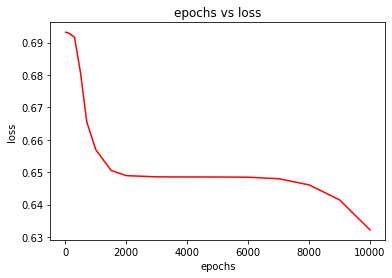

In [21]:
plt.plot(epochs_list,losses_list,color='r')
plt.title('epochs vs loss')
plt.xlabel('epochs')
plt.ylabel('loss')

In [22]:
# Save the trained model
torch.save(rnn.state_dict(), 'trained_model_rnn.pth')

In [2]:
# # Load the saved model
# loaded_model = RNN(num_channels, hidden_size, num_classes)
# loaded_model.load_state_dict(torch.load('trained_model_rnn.pth'))

<All keys matched successfully>

In [23]:
# Read the CSV file
data_frame = pd.read_csv('/home/saqib/projects/neuromorphicComputing/emg_data_class1_test.csv')

# Convert the DataFrame to a tensor
class1_data = torch.tensor(data_frame.values, dtype=torch.float32)


# Read the CSV file
data_frame = pd.read_csv('/home/saqib/projects/neuromorphicComputing/emg_data_class2_test.csv')

# Convert the DataFrame to a tensor
class2_data = torch.tensor(data_frame.values, dtype=torch.float32)

# Assign labels to each class
class1_labels = torch.zeros(100, dtype=torch.long)
class2_labels = torch.ones(100, dtype=torch.long)


# Concatenate the data and labels
data = torch.cat((class1_data, class2_data), dim=0)
labels = torch.cat((class1_labels, class2_labels), dim=0)

# Reshape the data for RNN compatibility
data = data.unsqueeze(dim=0)  # Add a batch dimension
data = data.permute(1, 0, 2)  # Reshape to (sequence_length, batch_size, num_channels)

# Ensure labels have the same batch size as data
labels = labels.unsqueeze(dim=0)

# Calculate accuracy

correct = 0
total = labels.size(1)

with torch.no_grad():
    outputs = rnn(data)
    _, predicted = torch.max(outputs.squeeze(dim=0).data, 1)
    correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f"Accuracy: {accuracy}%")

Accuracy: 57.49999999999999%


<img src = '/home/saqib/Pictures/Screenshots/lossVSepoch.png' alt="loss vs epochs">


In [24]:
# Print the predicted labels
print("Predicted Labels:")
print(predicted)

Predicted Labels:
tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1])


In [25]:
print(losses_list)

[0.693205714225769, 0.6931171417236328, 0.6930366158485413, 0.6916710734367371, 0.6805242300033569, 0.6656092405319214, 0.65693598985672, 0.6505345106124878, 0.6489424705505371, 0.6485673189163208, 0.648534893989563, 0.6485234498977661, 0.6484548449516296, 0.6479994654655457, 0.6460892558097839, 0.6414579153060913, 0.6321865320205688]
